In [70]:
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [71]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# # Create an endpoint URL for a city.
# city_url = url + "&q=" + "Boston"
# # Make a 'Get' request for the city weather.
# city_weather = requests.get(city_url)

In [72]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#zip packs each pair of lats and lngs having the same index in their respective array into a tuple. 
#1500 pairs of tuples that can be accessed by the index 0 & 1
lat_lngs = zip(lats, lngs)
lat_lngs

# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [73]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | adwa
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | alice springs
Processing Record 6 of Set 1 | san quintin
Processing Record 7 of Set 1 | pedernales
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | bilma
Processing Record 11 of Set 1 | slobodskoy
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | mayya
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | northam
Processing Record 17 of Set 1 | nabire
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | taiyuan
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | lasa
Processing Re

City not found. Skipping...
Processing Record 40 of Set 4 | majene
Processing Record 41 of Set 4 | marcona
City not found. Skipping...
Processing Record 42 of Set 4 | namatanai
Processing Record 43 of Set 4 | kavieng
Processing Record 44 of Set 4 | play cu
City not found. Skipping...
Processing Record 45 of Set 4 | lebu
Processing Record 46 of Set 4 | saskylakh
Processing Record 47 of Set 4 | pervomayskoye
Processing Record 48 of Set 4 | clyde river
Processing Record 49 of Set 4 | wahiawa
Processing Record 50 of Set 4 | paamiut
Processing Record 1 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 5 | jalu
Processing Record 3 of Set 5 | itoman
Processing Record 4 of Set 5 | port alfred
Processing Record 5 of Set 5 | lerici
Processing Record 6 of Set 5 | hobyo
Processing Record 7 of Set 5 | cairns
Processing Record 8 of Set 5 | turukhansk
Processing Record 9 of Set 5 | boyolangu
Processing Record 10 of Set 5 | dubbo
Processing Record 11 of Set 5 | tabory
Proce

Processing Record 25 of Set 8 | kushmurun
City not found. Skipping...
Processing Record 26 of Set 8 | pangody
Processing Record 27 of Set 8 | decin
Processing Record 28 of Set 8 | bestobe
Processing Record 29 of Set 8 | salvador
Processing Record 30 of Set 8 | sainte-maxime
Processing Record 31 of Set 8 | upernavik
Processing Record 32 of Set 8 | sisimiut
Processing Record 33 of Set 8 | desnogorsk
Processing Record 34 of Set 8 | tsiroanomandidy
Processing Record 35 of Set 8 | kirakira
Processing Record 36 of Set 8 | jha jha
Processing Record 37 of Set 8 | dukhovshchina
Processing Record 38 of Set 8 | soyo
Processing Record 39 of Set 8 | khonuu
City not found. Skipping...
Processing Record 40 of Set 8 | satitoa
City not found. Skipping...
Processing Record 41 of Set 8 | wahran
City not found. Skipping...
Processing Record 42 of Set 8 | lolua
City not found. Skipping...
Processing Record 43 of Set 8 | hargeysa
Processing Record 44 of Set 8 | xinqing
Processing Record 45 of Set 8 | maning

Processing Record 9 of Set 12 | pangai
Processing Record 10 of Set 12 | lethem
Processing Record 11 of Set 12 | fukue
Processing Record 12 of Set 12 | kon tum
Processing Record 13 of Set 12 | balabac
Processing Record 14 of Set 12 | veraval
Processing Record 15 of Set 12 | patea
Processing Record 16 of Set 12 | jacareacanga
Processing Record 17 of Set 12 | laminusa
Processing Record 18 of Set 12 | chicama
Processing Record 19 of Set 12 | plettenberg bay
Processing Record 20 of Set 12 | koulamoutou
Processing Record 21 of Set 12 | gasa
Processing Record 22 of Set 12 | szczecinek
Processing Record 23 of Set 12 | agidel
Processing Record 24 of Set 12 | vadum
Processing Record 25 of Set 12 | mackay
Processing Record 26 of Set 12 | kamuli
Processing Record 27 of Set 12 | san rafael
Processing Record 28 of Set 12 | talas
Processing Record 29 of Set 12 | yarmouth
Processing Record 30 of Set 12 | general pico
Processing Record 31 of Set 12 | novyy urgal
Processing Record 32 of Set 12 | kandria

In [74]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Adwa,14.16,38.90,65.71,57,95,6.46,ET,2019-11-10 21:08:24
1,Bethel,60.79,-161.76,39.20,93,90,10.29,US,2019-11-10 21:05:45
2,Ribeira Grande,38.52,-28.70,64.40,82,20,3.36,PT,2019-11-10 21:08:25
3,Alice Springs,-23.70,133.88,55.40,16,81,3.36,AU,2019-11-10 21:06:13
4,San Quintin,17.54,120.52,70.97,90,73,3.85,PH,2019-11-10 21:06:32
5,Pedernales,0.07,-80.05,74.61,80,91,7.40,EC,2019-11-10 21:08:25
6,Cherskiy,68.75,161.30,10.38,55,97,2.55,RU,2019-11-10 21:08:25
7,Carnarvon,-30.97,22.13,64.20,52,24,7.49,ZA,2019-11-10 21:08:26
8,Bilma,18.69,12.92,78.66,14,53,7.99,NE,2019-11-10 21:07:14
9,Slobodskoy,58.73,50.18,32.41,92,100,8.84,RU,2019-11-10 21:08:26


In [75]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [76]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

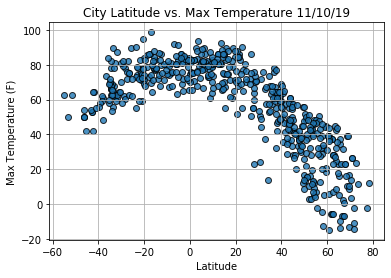

In [77]:
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

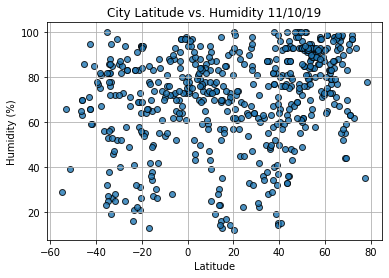

In [78]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

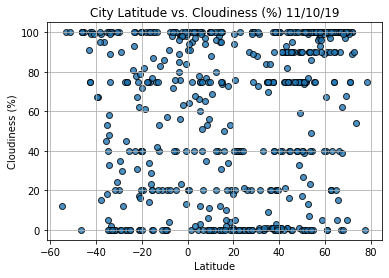

In [79]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

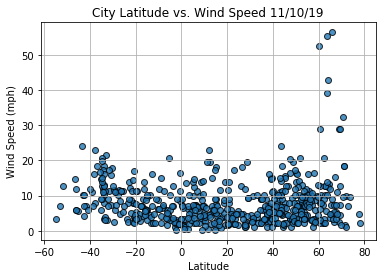

In [80]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [90]:
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [85]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

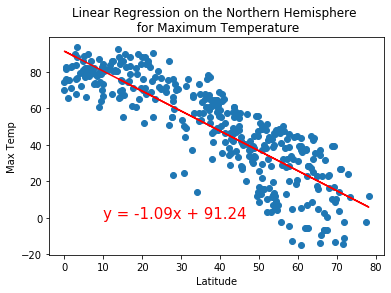

In [95]:
# Linear regression on the Northern Hemisphere and its Max Temperatures
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,0))

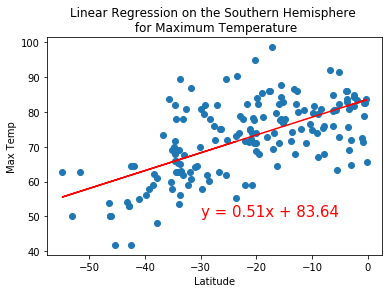

In [98]:
# Linear regression on the Northern Hemisphere and its Max Temperatures
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-30,50))

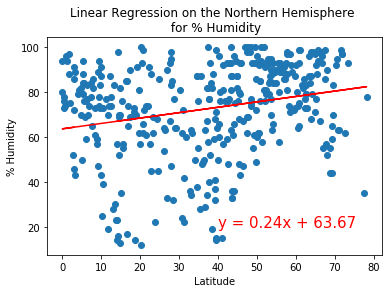

In [102]:
# Linear regression on the Northern Hemisphere and its Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity',(40,20))

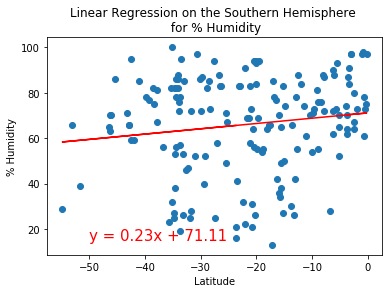

In [104]:
# Linear regression on the Southern Hemisphere and its Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',(-50,15))

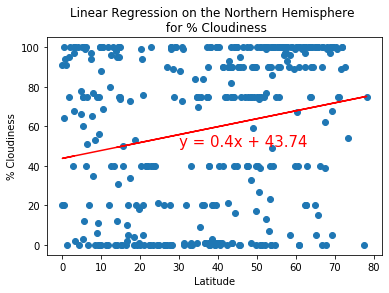

In [107]:
# Linear regression on the Northern Hemisphere and its Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(30,50))

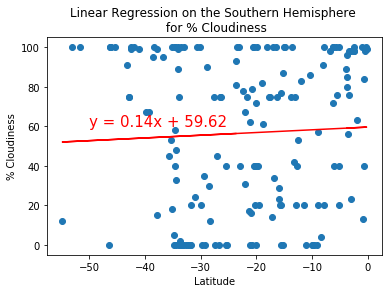

In [112]:
# Linear regression on the Southern Hemisphere and its Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(-50,60))

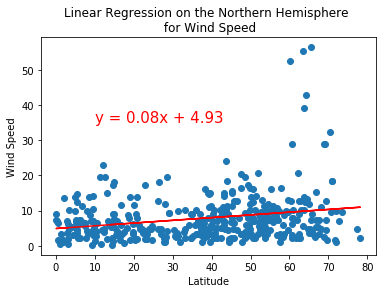

In [115]:
# Linear regression on the Northern Hemisphere and its wind speeds
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed',(10,35))

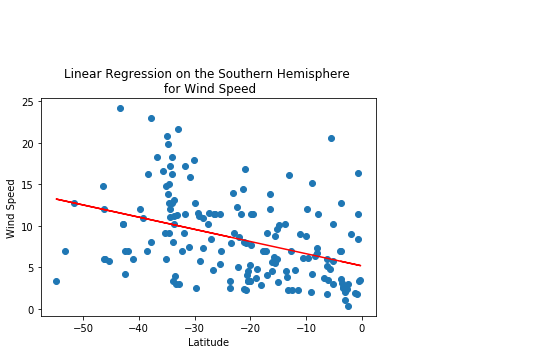

In [117]:
# Linear regression on the Southern Hemisphere and its wind speeds
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',(10,25))